# Deteccion de anomalias


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [6]:
encuesta_original = pd.read_csv("data/ENCUESTA_2_Responses.csv")
#print(encuesta_original.columns)

In [7]:
encuesta = encuesta_original[encuesta_original[encuesta_original.columns[10]] == "Si"]
encuesta = encuesta[encuesta[encuesta.columns[12]] == "Si acepta entrevista"]
encuesta.drop(columns=encuesta.columns[8:14], inplace=True)

In [8]:
encuesta = encuesta.drop(columns=encuesta.columns[4:7])
encuesta

,Date Collected,Date Sent,Duration (seconds),User,Municipio,Género,¿Cuántos años cumplidos tiene usted?,¿Cuál es su principal ocupación?,"En las pasadas elecciones de 2015 usted, ¿asistió a votar o no asistió a votar?","En las pasadas elecciones PARA SENADOR de 2012 usted, ¿asistió a votar o no asistió a votar?","En las pasadas elecciones PARA SENADOR de 2012, ¿por cuál de los siguientes candidatos votó usted?",El próximo 1 de julio de este año habrá elecciones. ¿Usted planea ir a votar o no planea ir a votar en las próximas elecciones?,¿Si hoy fuera la elección para Senadores por Sonora por quién votaría? (Respuesta espontánea),"¿Ha oído hablar o no ha oído hablar de Manuel Ignacio ""Maloro"" Acosta?","¿Diría que su opinión acerca de Manuel Ignacio ""Maloro"" Acosta es muy buena, buena, mala o muy mala?","¿Ha oído hablar o no ha oído hablar de Antonio ""Toño"" Astiazarán?","¿Diría que su opinión acerca de Antonio ""Toño"" Astiazarán es muy buena, buena, mala o muy mala?",¿Ha oído hablar o no ha oído hablar de Sylvana Beltrones?,"¿Diría que su opinión acerca de Sylvana Beltrones es muy buena, buena, mala o muy mala?",¿Ha oído hablar o no ha oído hablar de Lily Téllez?,"¿Diría que su opinión acerca de Lily Tellez es muy buena, buena, mala o muy mala?",¿Ha oído hablar o no ha oído hablar de Leticia Cuesta?,"¿Diría que su opinión acerca de Leticia Cuesta es muy buena, buena, mala o muy mala?",¿Ha oído hablar o no ha oído hablar de Alfonso Durazo?,"¿Diría que su opinión acerca de Alfonso Durazo es muy buena, buena, mala o muy mala?","Si hoy fuera la elección para SENADORES POR SONORA, ¿por cuál coalición votaría usted?","Si hoy fuera la elección para SENADORES POR SONORA y los candidatos fueran los siguientes, ¿por cuál de ellos votaría?","Si hoy fuera la elección para SENADORES POR SONORA y sólo pudiera elegir entre los candidatos Antonio “Toño” Astiazarán y Leticia Cuesta de la coalición PAN – PRD – MC y los candidatos Sylvana Beltrones y Manuel Ignacio “Maloro” Acosta de la coalición PRI – PVEM - PANAL, ¿por cuál de ellos votaría?","Si hoy fuera la elección para SENADORES POR SONORA y sólo pudiera elegir entre los candidatos Sylvana Beltrones y Manuel Ignacio “Maloro” Acosta de la coalición PRI - PVEM – PANAL y los candidatos Lily Téllez y Alfonso Durazo de la coalición MORENA – PT - PES, ¿por cuál de ellos votaría?","Si hoy fuera la elección para SENADORES POR SONORA y sólo pudiera elegir entre los candidatos Antonio “Toño Astiazarán y Leticia Cuesta de la coalición PAN – PRD – MC y los candidatos Lily Téllez y Alfonso Durazo de la coalición MORENA – PT – PES, ¿por cuál de ellos votaría?","Si hoy fuera la elección para SENADORES POR SONORA y los candidatos fueran los siguientes, ¿cuál de ellos cree usted que ganaría?","Sylvana Beltrones y Manuel Ignacio ""Maloro"" Acosta - PRI PVEM PANAL","Antonio ""Toño"" Astiazaran y Leticia Cuesta - PAN PRD Movimiento Ciudadano",Lily Tellez y Alfonso Durazo - MORENA PES PT,"¿Si hoy fueran las elecciones, por cuál de los siguientes candidatos NUNCA votaría para SENADORES POR SONORA?","Si hoy fuera la elección para elegir a su diputado para el CONGRESO DEL ESTADO DE SONORA, ¿por cuál partido votaría usted?",¿Por cuál partido NUNCA votaría para elegir a su diputado para el CONGRESO DEL ESTADO DE SONORA?,"Usted, por lo general, se considera del PRI, del PAN, del PRD, del Verde, del PT, de Movimiento Ciudadano, del PANAL, de MORENA, del PES u otro?","Si hoy fuera la elección para PRESIDENTE DE LA REPÚBLICA y los candidatos fueran los siguientes, ¿por cuál de ellos votaría?",¿Usted utiliza la red social Whatsapp?,¿Usted utiliza la red social Facebook?,¿En que dispositivo utiliza mayormente Facebook?,"Pensando en los canales de televisión abierta que ve normalmente, ¿cuál es el primer canal de televisión abierta que se le viene a la mente? (NO DAR OPCIONES, RESPUESTA ESPONTÁNEA)","¿Algún otro canal de televisión abierta que se le venga a la mente? (NO

#### Hacemos un subset de los datos con las siguientes columnas

In [9]:
col_to_analize = ["User",
                  "Si hoy fuera la elección para SENADORES POR SONORA, ¿por cuál coalición votaría usted?",
                  "Si hoy fuera la elección para SENADORES POR SONORA y los candidatos fueran los siguientes, ¿por cuál de ellos votaría?",
                  "Si hoy fuera la elección para SENADORES POR SONORA y los candidatos fueran los siguientes, ¿cuál de ellos cree usted que ganaría?",
                  "¿Si hoy fueran las elecciones, por cuál de los siguientes candidatos NUNCA votaría para SENADORES POR SONORA?",
                  "¿Por cuál partido NUNCA votaría para elegir a su diputado para el CONGRESO DEL ESTADO DE SONORA?",
                  "Si hoy fuera la elección para PRESIDENTE DE LA REPÚBLICA y los candidatos fueran los siguientes, ¿por cuál de ellos votaría?"
                 ]
df = encuesta[col_to_analize]
df.head(15)

,User,"Si hoy fuera la elección para SENADORES POR SONORA, ¿por cuál coalición votaría usted?","Si hoy fuera la elección para SENADORES POR SONORA y los candidatos fueran los siguientes, ¿por cuál de ellos votaría?","Si hoy fuera la elección para SENADORES POR SONORA y los candidatos fueran los siguientes, ¿cuál de ellos cree usted que ganaría?","¿Si hoy fueran las elecciones, por cuál de los siguientes candidatos NUNCA votaría para SENADORES POR SONORA?",¿Por cuál partido NUNCA votaría para elegir a su diputado para el CONGRESO DEL ESTADO DE SONORA?,"Si hoy fuera la elección para PRESIDENTE DE LA REPÚBLICA y los candidatos fueran los siguientes, ¿por cuál de ellos votaría?"
0,Electoral2,MORENA - PES - PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,"Antonio ""Toño"" Astiazarán y Leticia Cuesta - P...",PAN,Andrés Manuel López Obrador - MORENA PES PT
1,Electoral4,PAN - PRD - MC,"Antonio ""Toño"" Astiazaran y Leticia Cuesta - P...","Antonio ""Toño"" Astiazaran y Leticia Cuesta - P...","Sylvana Beltrones y Manuel Ignacio ""Maloro"" Ac...",PRI,Ricardo Anaya - PAN PRD MC
2,Electoral2,PRI - PVEM - PANAL,"Sylvana Beltrones y Manuel Ignacio ""Maloro"" Ac...","Sylvana Beltrones y Manuel Ignacio ""Maloro"" Ac...","Antonio ""Toño"" Astiazarán y Leticia Cuesta - P...",PAN,Jose Antonio Meade - PRI PVEM PANAL
3,Electoral3,MORENA - PES - PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,"Sylvana Beltrones y Manuel Ignacio ""Maloro"" Ac...","Sylvana Beltrones y Manuel Ignacio ""Maloro"" Ac...",PRD,Andrés Manuel López Obrador - MORENA PES PT
4,Electoral1,MORENA - PES - PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,Ninguno (NO MENCIONAR),No contesta,Andrés Manuel López Obrador - MORENA PES PT
5,Electoral3,MORENA - PES - PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,"Sylvana Beltrones y Manuel Ignacio ""Maloro"" Ac...",PRI,Andrés Manuel López Obrador - MORENA PES PT
6,Electoral1,PAN - PRD - MC,"Antonio ""Toño"" Astiazaran y Leticia Cuesta - P...","Antonio ""Toño"" Astiazaran y Leticia Cuesta - P...","Antonio ""Toño"" Astiazarán y Leticia Cuesta - P...",PRI,Andrés Manuel López Obrador - MORENA PES PT
7,Electoral3,MORENA - PES - PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,"Antonio ""Toño"" Astiazarán y Leticia Cuesta - P...",PAN,Andrés Manuel López Obrador - MORENA PES PT
8,Electoral1,MORENA - PES - PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,Lily Tellez y Alfonso Durazo - MORENA PES PT,"Antonio ""Toño"" Astiazarán y Leticia Cuesta - P...",PRD,Andrés Manuel López Obrador - MORENA PES PT
9,Electoral5,Ninguno (NO MENCIONAR),Ninguno (No mencionar),Ninguno (No mencionar),Ninguno (NO MENCIONAR),Ninguno (NO MENCIONAR),Ninguno (No Mencionar)


In [10]:
# Valores unicos de cada columna
#Usuarios
print("Usuario : \n{}\n".format(df[col_to_analize[0]].unique()))
# Si hoy fuera la elección para SENADORES POR SONORA, ¿por cuál coalición votaría usted?
print("Senadores por coalicion a votar : \n{}\n".format(df[col_to_analize[1]].unique()))

# Si hoy fuera la elección para SENADORES POR SONORA y los candidatos fueran los siguientes, ¿por cuál de ellos votaría?
print("Candidatos Senadores a votar : \n{}\n".format(df[col_to_analize[2]].unique()))

# Si hoy fuera la elección para SENADORES POR SONORA y los candidatos fueran los siguientes, ¿cuál de ellos cree usted que ganaría?
print("Candidatos Senadores creen que ganara : \n{}\n".format(df[col_to_analize[3]].unique()))

#¿Si hoy fueran las elecciones, por cuál de los siguientes candidatos NUNCA votaría para SENADORES POR SONORA?
print("Candidatos Senadores nunca votaria : \n{}\n".format(df[col_to_analize[4]].unique()))

#¿Por cuál partido NUNCA votaría para elegir a su diputado para el CONGRESO DEL ESTADO DE SONORA?
print("Partidos nunca votaria : \n{}\n".format(df[col_to_analize[5]].unique()))

#Si hoy fuera la elección para PRESIDENTE DE LA REPÚBLICA y los candidatos fueran los siguientes, ¿por cuál de ellos votaría?
print("Partido para presidente votaria : \n{}\n".format(df[col_to_analize[6]].unique()))

Usuario : 
['Electoral2' 'Electoral4' 'Electoral3' 'Electoral1' 'Electoral5'
 'Electoral6' 'Electoral10' 'Electoral7' 'Electoral12' 'Electoral9'
 'Electoral8' 'Electoral11']

Senadores por coalicion a votar : 
['MORENA - PES - PT' 'PAN - PRD - MC' 'PRI - PVEM - PANAL'
 'Ninguno (NO MENCIONAR)' 'No sabe' 'No contesta' 'accion nacional']

Candidatos Senadores a votar : 
['Lily Tellez y Alfonso Durazo - MORENA PES PT'
 'Antonio "Toño" Astiazaran y Leticia Cuesta - PAN PRD Movimiento Ciudadano'
 'Sylvana Beltrones y Manuel Ignacio "Maloro" Acosta - PRI PVEM PANAL'
 'Ninguno (No mencionar)' 'No sabe' 'No contesta' nan 'accion nacional']

Candidatos Senadores creen que ganara : 
['Lily Tellez y Alfonso Durazo - MORENA PES PT'
 'Antonio "Toño" Astiazaran y Leticia Cuesta - PAN PRD Movimiento Ciudadano'
 'Sylvana Beltrones y Manuel Ignacio "Maloro" Acosta - PRI PVEM PANAL'
 'Ninguno (No mencionar)' 'No sabe' 'No contesta' nan 'accion nacional']

Candidatos Senadores nunca votaria : 
['Antonio 

In [11]:
encuestas_por_usuario = df.groupby(col_to_analize[0]).size().reset_index(name="Total")
encuestas_por_usuario.sort_values("Total",ascending=False)

,User,Total
7,Electoral5,183
0,Electoral1,160
5,Electoral3,159
6,Electoral4,127
1,Electoral10,105
3,Electoral12,97
9,Electoral7,82
10,Electoral8,70
2,Electoral11,40
11,Electoral9,21


## Analisis por senadores

In [12]:
df_sen_coalicion =  df.groupby([col_to_analize[0],col_to_analize[1]]).size().reset_index(name="Total")
df_sen_coalicion.head(10)

,User,"Si hoy fuera la elección para SENADORES POR SONORA, ¿por cuál coalición votaría usted?",Total
0,Electoral1,MORENA - PES - PT,62
1,Electoral1,Ninguno (NO MENCIONAR),9
2,Electoral1,No contesta,4
3,Electoral1,No sabe,7
4,Electoral1,PAN - PRD - MC,25
5,Electoral1,PRI - PVEM - PANAL,53
6,Electoral10,MORENA - PES - PT,37
7,Electoral10,Ninguno (NO MENCIONAR),15
8,Electoral10,No sabe,27
9,Electoral10,PAN - PRD - MC,15


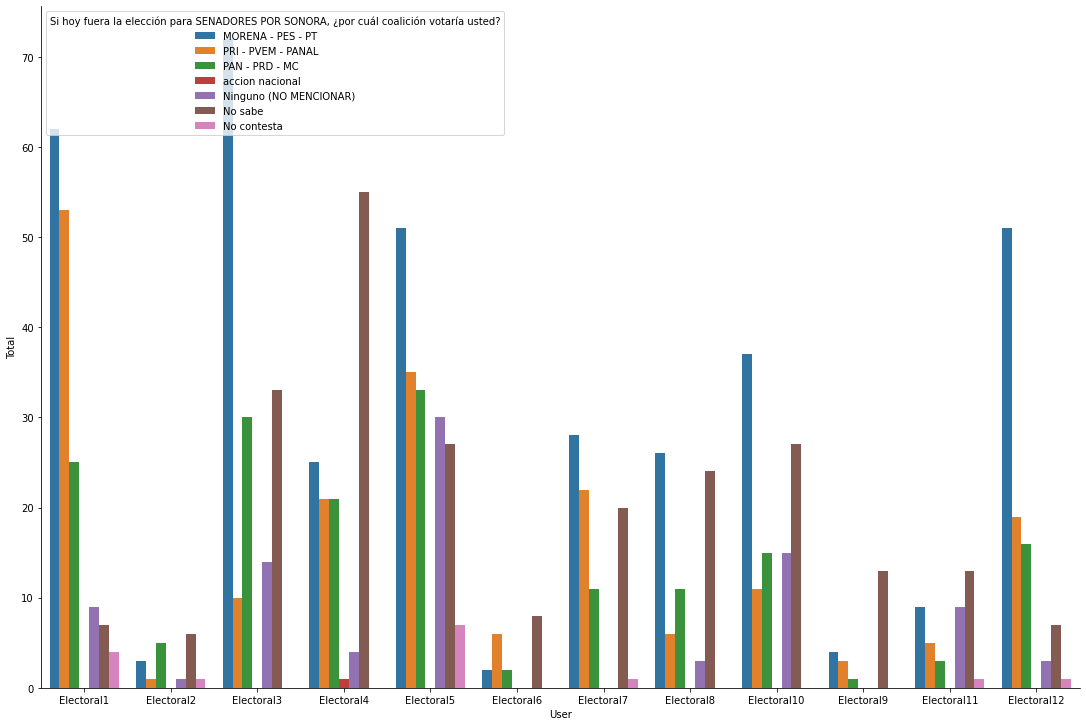

In [13]:
order_row = ['Electoral1','Electoral2','Electoral3','Electoral4','Electoral5','Electoral6',
             'Electoral7','Electoral8', 'Electoral10','Electoral9','Electoral11','Electoral12']
order_hue = ['MORENA - PES - PT','PRI - PVEM - PANAL','PAN - PRD - MC','accion nacional',
     'Ninguno (NO MENCIONAR)', 'No sabe', 'No contesta']
sns.catplot(x="User", y="Total", hue="Si hoy fuera la elección para SENADORES POR SONORA, ¿por cuál coalición votaría usted?",kind="bar", data=df_sen_coalicion, height=10,aspect=1.5, legend_out=False,order=order_row,hue_order=order_hue)

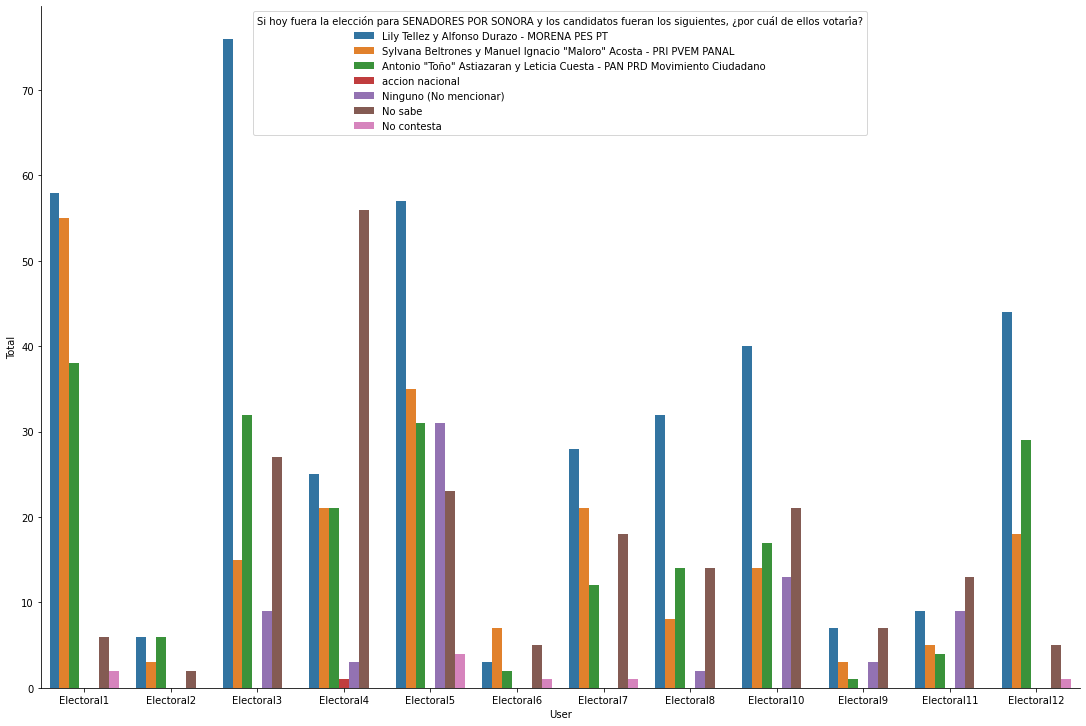

In [14]:
order_hue2 = ['Lily Tellez y Alfonso Durazo - MORENA PES PT',
    'Sylvana Beltrones y Manuel Ignacio "Maloro" Acosta - PRI PVEM PANAL',
    'Antonio "Toño" Astiazaran y Leticia Cuesta - PAN PRD Movimiento Ciudadano',
    'accion nacional',
    'Ninguno (No mencionar)', 'No sabe', 'No contesta' ]
df_sen_votaria =  df.groupby([col_to_analize[0],col_to_analize[2]]).size().reset_index(name="Total")
sns.catplot(x="User", y="Total", hue=col_to_analize[2],kind="bar", data=df_sen_votaria, height=10,aspect=1.5, legend_out=False,order=order_row, hue_order=order_hue2)

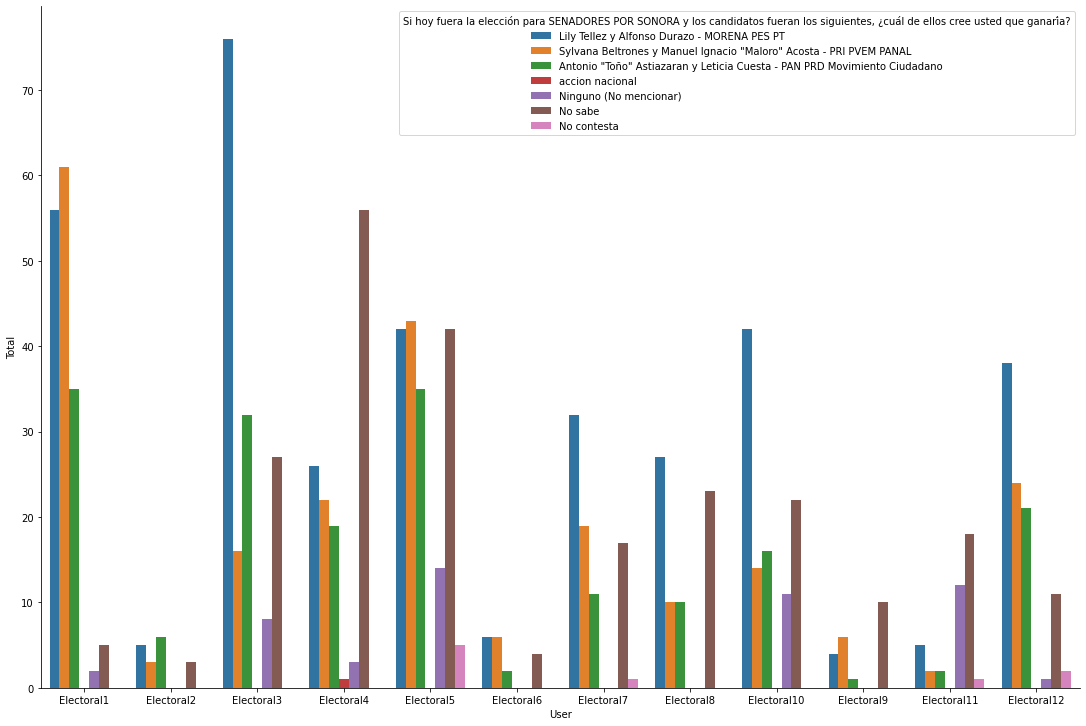

In [15]:
order_hue3 = ['Lily Tellez y Alfonso Durazo - MORENA PES PT',
    'Sylvana Beltrones y Manuel Ignacio "Maloro" Acosta - PRI PVEM PANAL',
    'Antonio "Toño" Astiazaran y Leticia Cuesta - PAN PRD Movimiento Ciudadano',
    'accion nacional',
    'Ninguno (No mencionar)', 'No sabe', 'No contesta' ]
df_sen_ganaria =  df.groupby([col_to_analize[0],col_to_analize[3]]).size().reset_index(name="Total")
sns.catplot(x="User", y="Total", hue=col_to_analize[3],kind="bar", data=df_sen_ganaria, height=10,aspect=1.5, legend_out=False,order=order_row, hue_order=order_hue2)

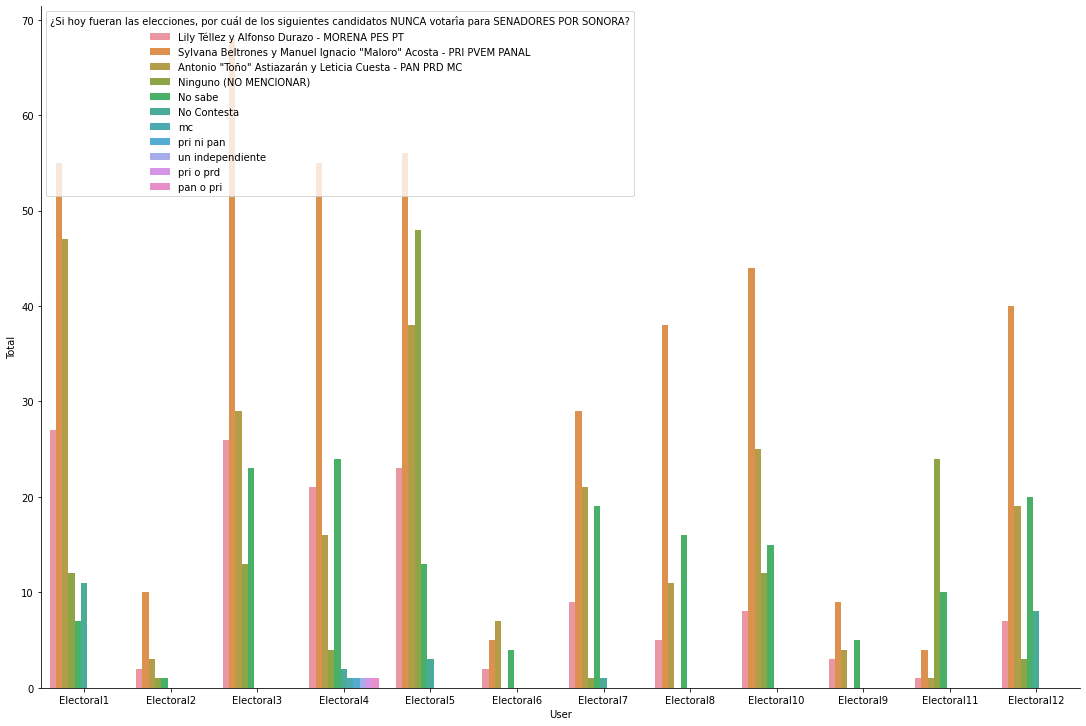

In [16]:
order_hue4 = ['Lily Téllez y Alfonso Durazo - MORENA PES PT',
 'Sylvana Beltrones y Manuel Ignacio "Maloro" Acosta - PRI PVEM PANAL',
 'Antonio "Toño" Astiazarán y Leticia Cuesta - PAN PRD MC',
 'Ninguno (NO MENCIONAR)',
 'No sabe','No Contesta','mc','pri ni pan','un independiente',
 'pri o prd','pan o pri']
df_sen_nunca_votaria =  df.groupby([col_to_analize[0],col_to_analize[4]]).size().reset_index(name="Total")
sns.catplot(x="User", y="Total", hue=col_to_analize[4],kind="bar", data=df_sen_nunca_votaria, height=10,aspect=1.5, legend_out=False,order=order_row, hue_order=order_hue4)

## Partido nunca votaria para el congreso del estado de Sonora

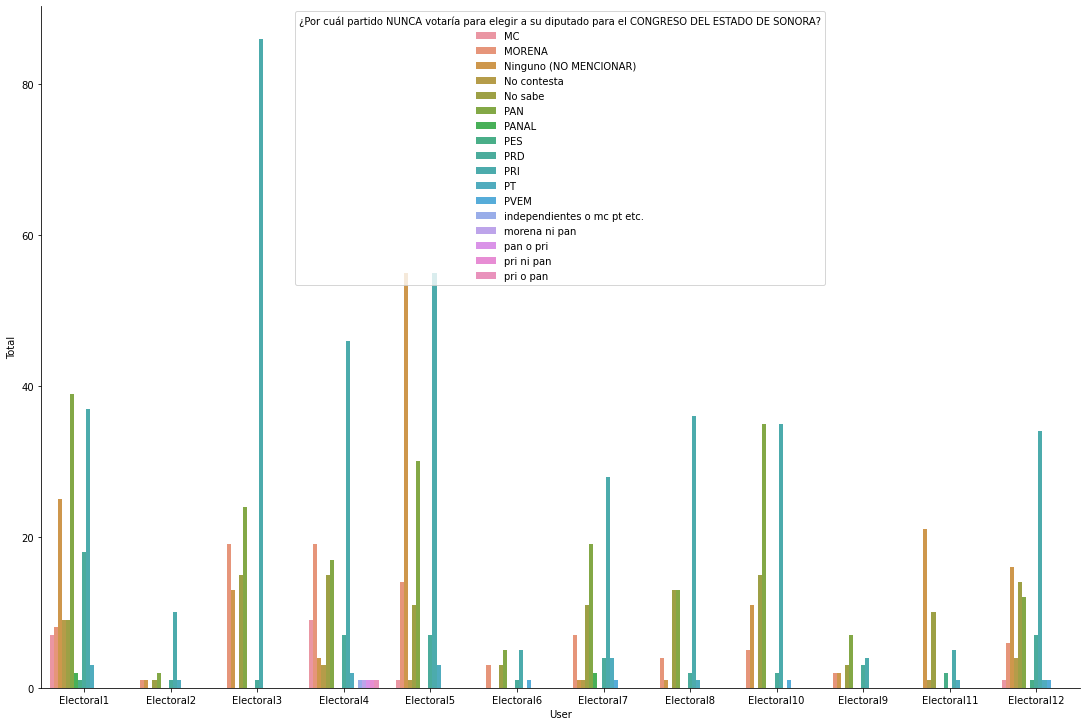

In [17]:
df_partido_nunca_ganaria =  df.groupby([col_to_analize[0],col_to_analize[5]]).size().reset_index(name="Total")
sns.catplot(x="User", y="Total", hue=col_to_analize[5],kind="bar", data=df_partido_nunca_ganaria, height=10,aspect=1.5, legend_out=False,order=order_row)

## Presidente de la republica

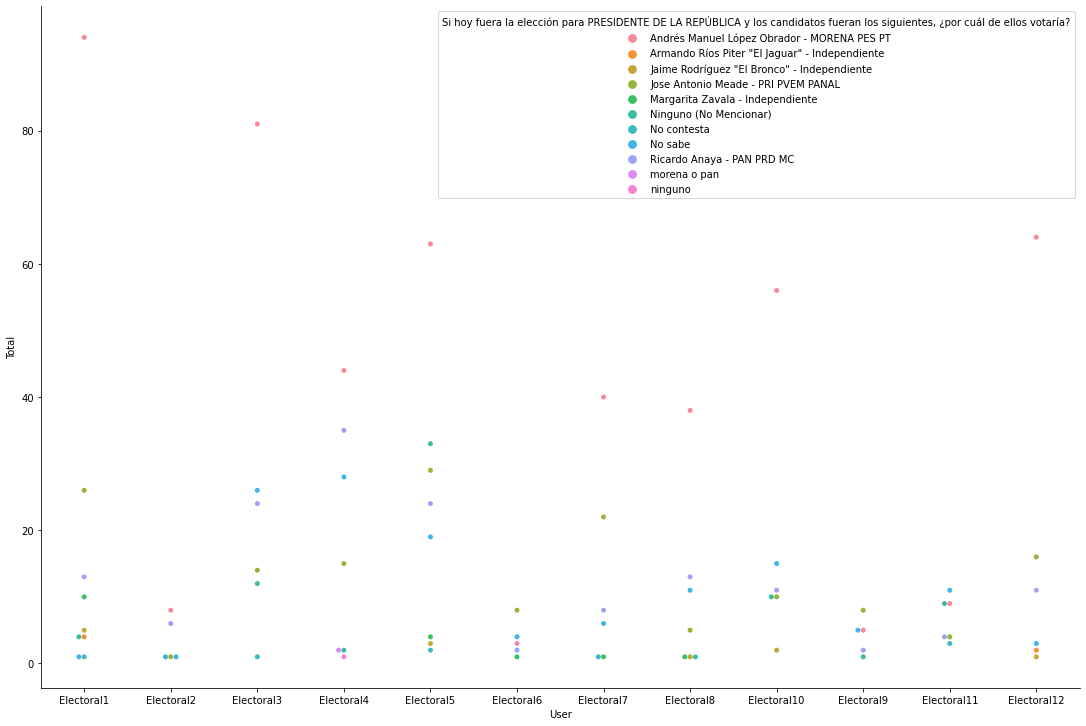

In [18]:
df_partido_presidente =  df.groupby([col_to_analize[0],col_to_analize[6]]).size().reset_index(name="Total")
sns.catplot(x="User", y="Total", hue=col_to_analize[6],kind="swarm", data=df_partido_presidente, height=10,aspect=1.5, legend_out=False,order=order_row)

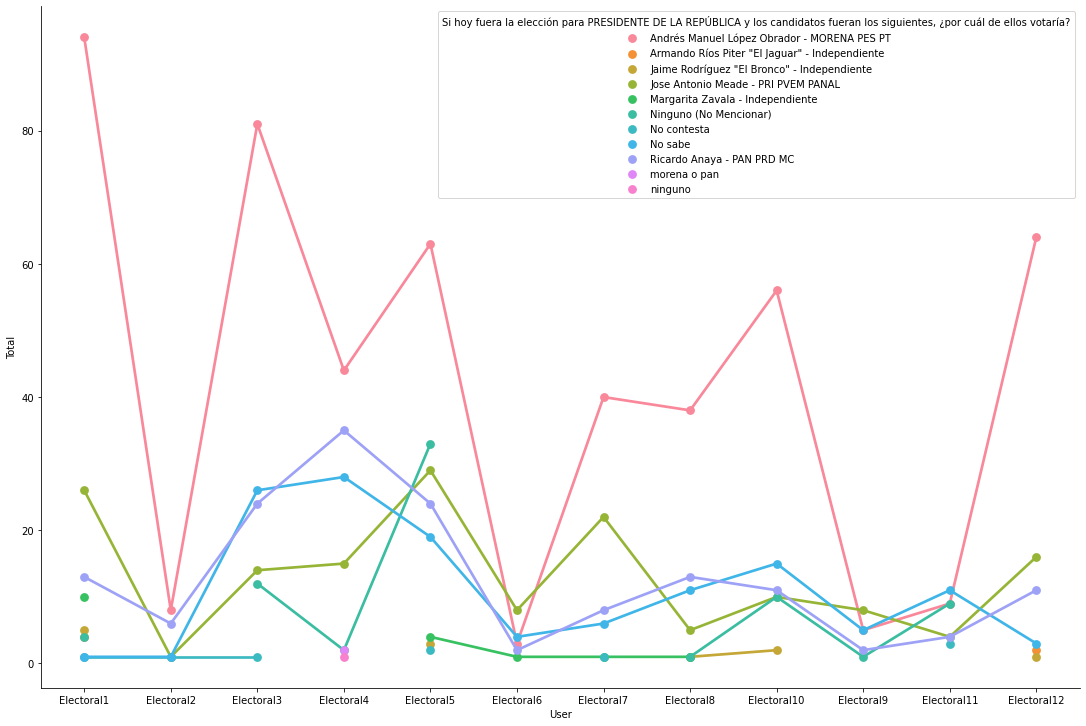

In [19]:
# Otra representacion
sns.catplot(x="User", y="Total", hue=col_to_analize[6],kind="point", data=df_partido_presidente, height=10,aspect=1.5, legend_out=False,order=order_row)